<a href="https://colab.research.google.com/github/palakgupta1214/Stock-Price-Prediction-using-ML/blob/main/Analysis_using_ARIMA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Take input for stock symbol from user
symbol = input("Enter stock symbol: ")

Enter stock symbol: MSFT


In [ ]:
# Set start and end dates for historical data
end = pd.Timestamp.today()
start = end - pd.Timedelta(days=365) # 1 years data

# **Data**

In [ ]:
# Get historical data for chosen stock from Yahoo Finance using yfinance
data_frame = yf.download(symbol, start=start, end=end)
data_frame

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-03,283.959991,284.130005,280.149994,281.779999,279.042511,25978600
2022-05-04,282.589996,290.880005,276.730011,289.980011,287.162872,33599300
2022-05-05,285.540009,286.350006,274.339996,277.350006,274.655548,43260400
2022-05-06,274.809998,279.250000,271.269989,274.730011,272.061005,37780300
2022-05-09,270.059998,272.359985,263.320007,264.579987,262.009583,47726000
...,...,...,...,...,...,...
2023-04-26,296.700012,299.570007,292.730011,295.369995,295.369995,64599200
2023-04-27,295.970001,305.200012,295.250000,304.829987,304.829987,46462600
2023-04-28,304.010010,308.929993,303.309998,307.260010,307.260010,36446700


# **Correlation**

In [ ]:
# Calculate the correlation matrix
corr_matrix = data_frame.corr()

# Display the correlation matrix
print(corr_matrix)

# A correlation matrix is a table that displays the correlation coefficients between multiple variables

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.990599  0.991281  0.975591   0.974575 -0.125184
High       0.990599  1.000000  0.991023  0.990442   0.988971 -0.081892
Low        0.991281  0.991023  1.000000  0.989837   0.989656 -0.152383
Close      0.975591  0.990442  0.989837  1.000000   0.999145 -0.117298
Adj Close  0.974575  0.988971  0.989656  0.999145   1.000000 -0.115510
Volume    -0.125184 -0.081892 -0.152383 -0.117298  -0.115510  1.000000


<Axes: >

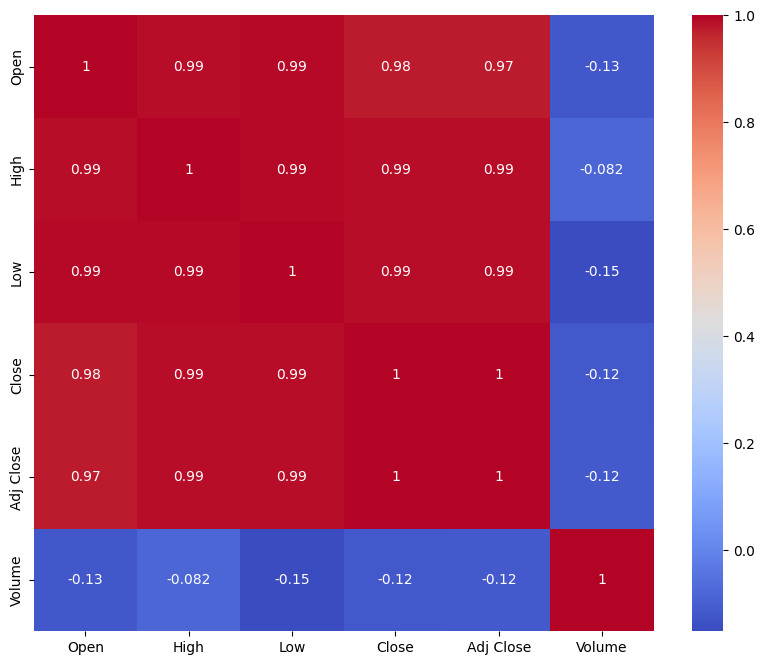

In [ ]:
# Plot the correlation matrix as a heatmap
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
# Numeric Values
numeric_feature=data_frame.select_dtypes(include=[np.number])
numeric_feature.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# We have to ignore Day and Diff_Close_Price
correlation=numeric_feature.corr()
print(correlation['Close'].sort_values(ascending=False),'\n')

Close        1.000000
Adj Close    0.999145
High         0.990442
Low          0.989837
Open         0.975591
Volume      -0.117298
Name: Close, dtype: float64 



Index(['Close', 'Adj Close', 'High', 'Low', 'Open'], dtype='object')


<Axes: >

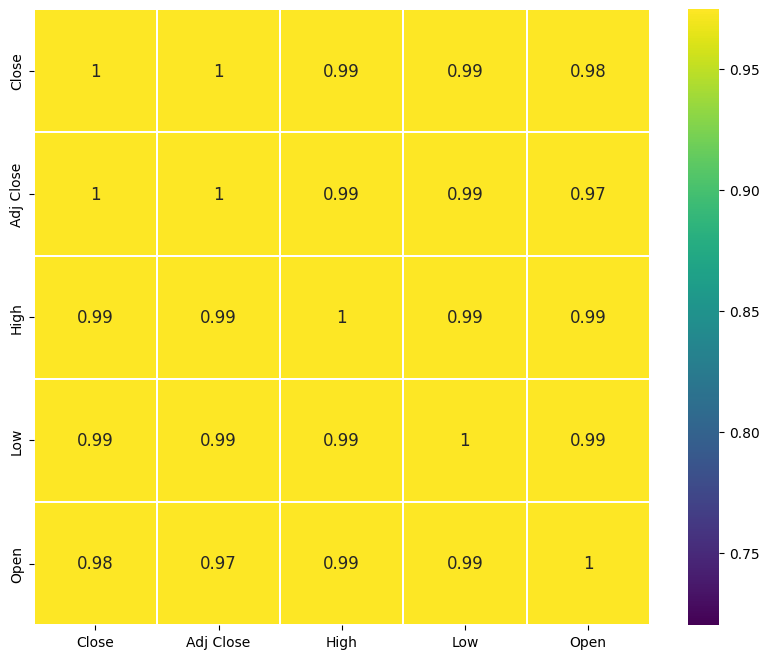

In [ ]:
# We are considering Threshold Value > 0.9
# Heat Map of Features (Threshold Value > 0.9)
k=5
cols=correlation.nlargest(k,'Close')['Close'].index
print(cols)
cm=np.corrcoef(data_frame[cols].values.T)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor="white", xticklabels=cols.values, annot_kws={'size':12}, yticklabels=cols.values)

In [ ]:
# Rest we drop because their correlation value is too low
# Dropping Featutes
df=data_frame.drop(['Volume'],axis=1)
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-05-03,283.959991,284.130005,280.149994,281.779999,279.042511
2022-05-04,282.589996,290.880005,276.730011,289.980011,287.162872
2022-05-05,285.540009,286.350006,274.339996,277.350006,274.655548
2022-05-06,274.809998,279.250000,271.269989,274.730011,272.061005
2022-05-09,270.059998,272.359985,263.320007,264.579987,262.009583
...,...,...,...,...,...
2023-04-26,296.700012,299.570007,292.730011,295.369995,295.369995
2023-04-27,295.970001,305.200012,295.250000,304.829987,304.829987
2023-04-28,304.010010,308.929993,303.309998,307.260010,307.260010


# **Check for Multicollinearity**

## **From VIF Factor**

In [ ]:
# Checking for Multicollinearity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the Predictor Variables(Features) and the Response Variable(Target Variable)
c = df[['Open', 'High', 'Low', 'Adj Close']]
d = df['Close']

# Fit the linear regression model
model = sm.OLS(d, sm.add_constant(c)).fit() # OLS (Ordinary Least Squares) model is a type of linear regression model used to estimate the relationship between a dependent variable(Close) and one or more independent variables

# Check for multicollinearity using variance inflation factor (VIF)
vif = pd.DataFrame()
vif['variables'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
print(vif)

   variables           VIF
0       Open  25462.378318
1       High  26480.778733
2        Low  31515.197303
3  Adj Close  20112.877955


In [ ]:
# The VIF measures the degree of multicollinearity for each predictor variable,
# If the VIF value is above 10, it is usually considered high and suggests that there is significant multicollinearity among the predictor variables.
# So, we will drop "Open","High","Low","Adj Close" because of high multicollinearity.

# **Visualization**

## **Line chart: It displays the Trend and Seasonality**

In [ ]:
# Dropping Featutes
final_data=df.drop(['Open', 'High', 'Low', 'Adj Close'],axis=1)
final_data

,Close
Date,
2022-05-03,281.779999
2022-05-04,289.980011
2022-05-05,277.350006
2022-05-06,274.730011
2022-05-09,264.579987
...,...
2023-04-26,295.369995
2023-04-27,304.829987
2023-04-28,307.260010


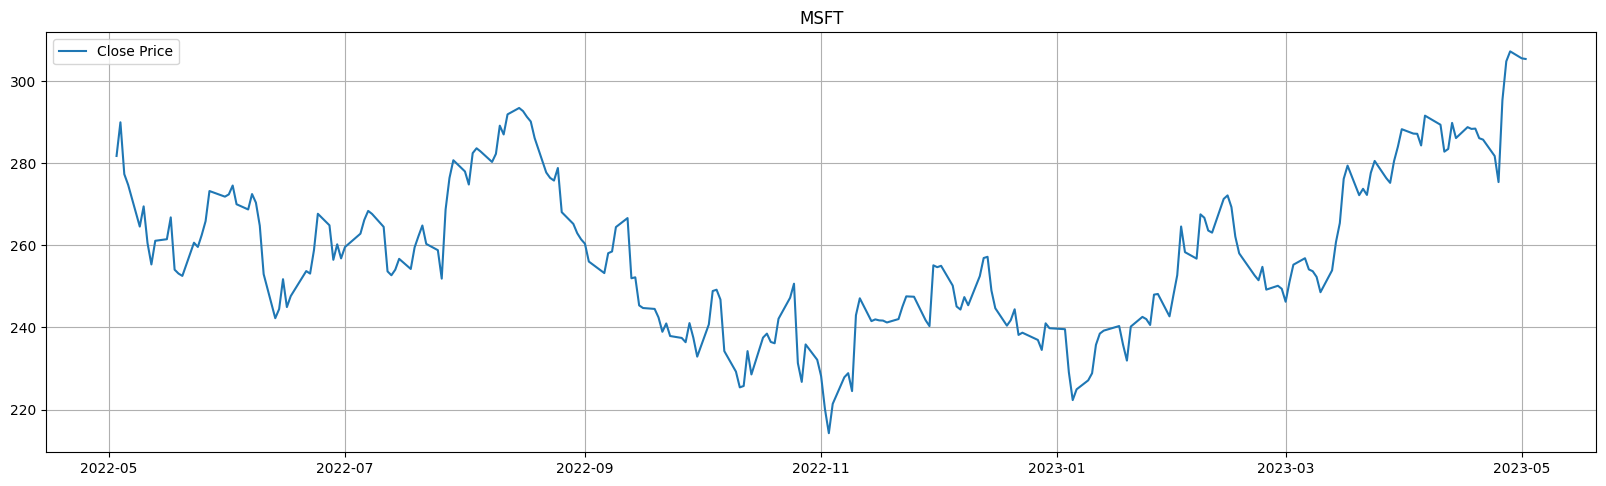

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.plot(final_data.Close, label='Close Price')
plt.title(symbol)
plt.legend()
plt.grid()
plt.show()

### **1. Checking Trend**

In [ ]:
# 1. Trend is Upward and Non-Linear
# 2. Non-Stationary Time Series
    # No constant mean
    # No constant variance

### **2. Checking Seasonality: Repeating Trends/Pattern over time**

In [ ]:
# As such no Seasonality in the graph

In [ ]:
# We will go for ARIMA (Autoregressive Integrated Moving Average)
# ARIMA, meaning that they only consider the past values of the target variable (univariate dataset).


# ARIMA Model:-


In [ ]:
data = list(final_data["Close"])

In [ ]:
# null hypothesis- time series is stationary
# alternative hypothesis- time series is non-stationary

In [ ]:
# Augmented Dickey-Fuller (ADF)- to test the non-stationarity of a time series.

from statsmodels.tsa.stattools import adfuller

result = adfuller(data)

print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Observations Used For ADF Regression:", result[3]).
# The results of the test can be used to determine whether or not the time series is stationary.

1. ADF :  -1.5865862482185464
2. P-Value :  0.4903281086756716
3. Num Of Observations Used For ADF Regression: 248


In [ ]:
"""The first line of output is the test statistic of the ADF test (ADF).
This statistic is negative, and the more negative it is, the stronger the evidence against the null hypothesis of a unit root and in favor of non-stationarity.

The second line of output is the p-value of the test (P-Value).
This is the probability of obtaining a test statistic at least as extreme as the one computed from the sample data, assuming that the null hypothesis is true.
If the p-value is less than the significance level (usually 0.05), we can reject the null hypothesis and conclude that the time series is non-stationary.

The third line of output is the number of observations used in the ADF regression (Num Of Observations Used For ADF Regression)."""

'The first line of output is the test statistic of the ADF test (ADF).\nThis statistic is negative, and the more negative it is, the stronger the evidence against the null hypothesis of a unit root and in favor of stationarity.\n\nThe second line of output is the p-value of the test (P-Value).\nThis is the probability of obtaining a test statistic at least as extreme as the one computed from the sample data, assuming that the null hypothesis is true.\nIf the p-value is less than the significance level (usually 0.05), we can reject the null hypothesis and conclude that the time series is stationary.\n\nThe third line of output is the number of observations used in the ADF regression (Num Of Observations Used For ADF Regression).'

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# pmdarima is a Python library that provides a convenient interface for fitting and predicting time series models, specifically using the AutoARIMA algorithm.

In [ ]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data, test = "adf")
print("d value:", d_value)

d value: 1


In [ ]:
""" If d=1, it means that first differencing is required to make the time series stationary.
    First differencing involves taking the difference between consecutive observations in the time series."""

' If d=1, it means that first differencing is required to make the time series stationary. \n    First differencing involves taking the difference between consecutive observations in the time series.'

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# AutoARIMA is an automated approach for identifying the best parameters for an ARIMA model, which is a popular time series forecasting model.

In [ ]:
# Split the data into train and test sets
x_train = data[:-60]   # use first n-60 days for training
x_test = data[-60:]    # use last 60 days for testing
print(len(x_train),len(x_test))

191 60


In [ ]:
import pmdarima as pm

def get_best_arima_order(data):

    stepwise_fit = pm.auto_arima(data, trace=True, suppress_warnings=True)
    order = stepwise_fit.order
    return order

In [ ]:
import statsmodels.api as sm

# Get best ARIMA order
order = get_best_arima_order(data)

# Fit ARIMA model
model = sm.tsa.arima.ARIMA(data, order=order)
model = model.fit()

# y(t) = c + ϕ(1)y(t-1) + ... + ϕ(p)y(t-p) + θ(1)ε(t-1) + ... + θ(q)ε(t-q) + ε(t)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1562.181, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1564.965, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1565.662, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1565.242, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1563.039, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1564.173, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1563.693, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1567.426, Time=0.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1564.141, Time=0.80 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1566.240, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1565.490, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1565.282, Time=0.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1564.938, Time=1.10 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1560.276, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [ ]:
# The notation ARIMA(p,d,q)(P,D,Q)[s] and the number of time steps in each seasonal period (s).

In [ ]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([255.53674784, 256.72709696, 270.8306656 , 266.29297592,
       260.74993213, 263.28241379, 274.3686663 , 271.85878105,
       266.53929014, 261.6642673 , 260.41693366, 253.20403331,
       249.99665566, 254.51586166, 249.68846707, 250.91585983,
       249.00648888, 245.4045479 , 251.97606193, 256.07905414,
       256.09512167, 253.07564268, 254.35225363, 253.17807064,
       247.96437963, 253.88321346, 261.46464004, 265.42997638,
       276.21576027, 278.9062533 , 271.30530398, 274.75337103,
       272.90928961, 277.52121466, 279.90014698, 275.83780901,
       275.91547456, 281.5588371 , 283.53429819, 287.48934464,
       287.13389258, 287.89242725, 284.27027883, 291.84438447,
       288.74696178, 282.16851006, 284.46875994, 290.97515471,
       284.71159637, 288.21514701, 289.2048707 , 289.06040625,
       285.3151368 , 285.31875478, 282.0417923 , 275.57146086,
       297.32396602, 304.25368052, 305.1216721 , 305.43080738])

In [ ]:
s = pd.Series(pred, index =final_data.index[-60:])
s

Date
2023-02-06    255.536748
2023-02-07    256.727097
2023-02-08    270.830666
2023-02-09    266.292976
2023-02-10    260.749932
2023-02-13    263.282414
2023-02-14    274.368666
2023-02-15    271.858781
2023-02-16    266.539290
2023-02-17    261.664267
2023-02-21    260.416934
2023-02-22    253.204033
2023-02-23    249.996656
2023-02-24    254.515862
2023-02-27    249.688467
2023-02-28    250.915860
2023-03-01    249.006489
2023-03-02    245.404548
2023-03-03    251.976062
2023-03-06    256.079054
2023-03-07    256.095122
2023-03-08    253.075643
2023-03-09    254.352254
2023-03-10    253.178071
2023-03-13    247.964380
2023-03-14    253.883213
2023-03-15    261.464640
2023-03-16    265.429976
2023-03-17    276.215760
2023-03-20    278.906253
2023-03-21    271.305304
2023-03-22    274.753371
2023-03-23    272.909290
2023-03-24    277.521215
2023-03-27    279.900147
2023-03-28    275.837809
2023-03-29    275.915475
2023-03-30    281.558837
2023-03-31    283.534298
2023-04-03    287.48

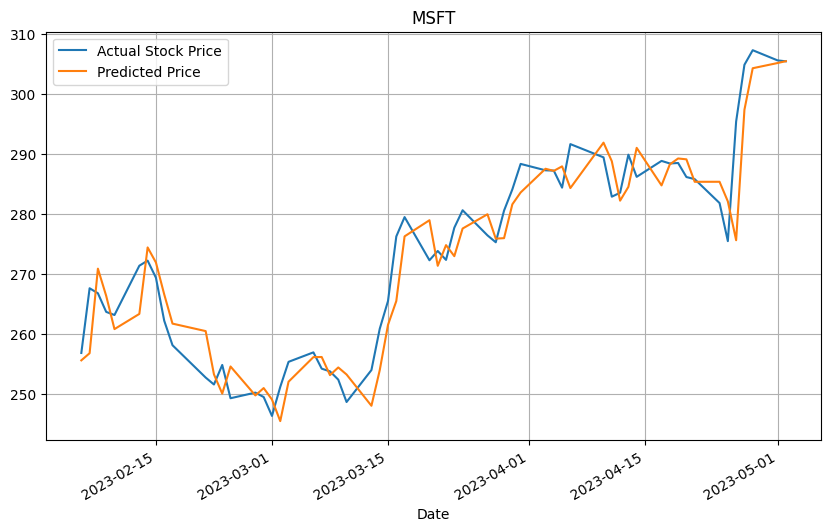

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
final_data['Close'][-60:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)
plt.title(symbol)
plt.legend()
plt.grid()
plt.show()

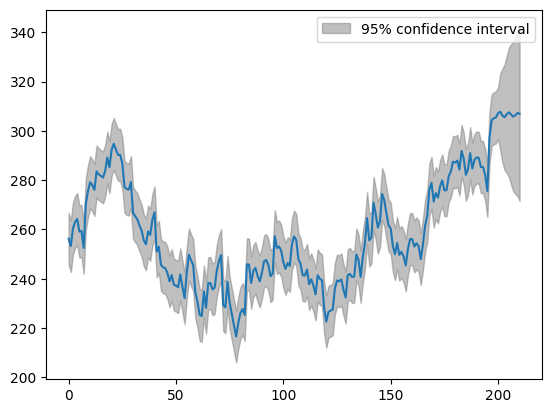

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-200, end = len(data)+10, dynamic = False);

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test, pred))

5.053086691648688

In [ ]:
from sklearn.metrics import r2_score # variability
r2_score(x_test, pred)

0.9049945658956264

# Predicting Future 10 values:

In [ ]:
pred_future = model.predict(start=end,end=end+9)
pred_future

array([305.43080738, 307.21919974, 307.71045438, 306.23002514,
       305.49203871, 306.6334878 , 307.51674192, 306.70208258,
       305.75978492, 306.27627095])

In [ ]:
import datetime
start_date = datetime.datetime.today() + datetime.timedelta(days=1)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(10)]

In [ ]:
pred_future2 = pd.Series(pred_future, index =dates)
pred_future2

2023-05-04 02:06:14.819392    305.430807
2023-05-05 02:06:14.819392    307.219200
2023-05-06 02:06:14.819392    307.710454
2023-05-07 02:06:14.819392    306.230025
2023-05-08 02:06:14.819392    305.492039
2023-05-09 02:06:14.819392    306.633488
2023-05-10 02:06:14.819392    307.516742
2023-05-11 02:06:14.819392    306.702083
2023-05-12 02:06:14.819392    305.759785
2023-05-13 02:06:14.819392    306.276271
dtype: float64

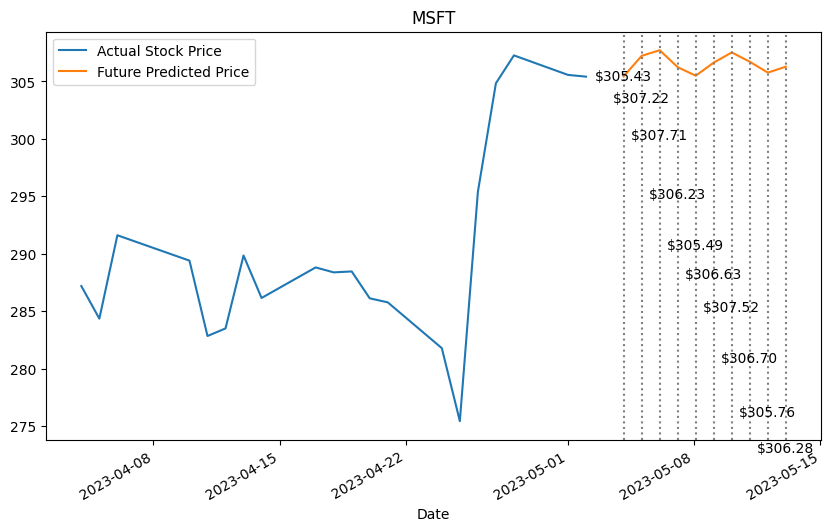

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
final_data['Close'][-20:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

max_price = pred_future2.max()
for i, (date, price) in enumerate(pred_future2.items()):
    offset = i*-0.012*max_price # adjust the offset as needed
    plt.axvline(x=date, linestyle='dotted', color='gray')
    plt.text(date, price+offset, f'${price:.2f}', ha='center', va='center', fontsize=10)
    if i == 9:
        break

plt.title(symbol)
plt.legend()
plt.show()